In [90]:
# Load useful libraries
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
!cp "/content/drive/MyDrive/Colab Notebooks/E82/kaggle.json" "/root/.kaggle/kaggle.json"

In [12]:
!kaggle competitions download -c csci-e-82-2022
!unzip csci-e-82-2022.zip

csci-e-82-2022.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  csci-e-82-2022.zip
  inflating: sample_solution.csv     
  inflating: test_data.csv           
  inflating: train_data.csv          


In [15]:
train = pd.read_csv("train_data.csv")
train.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,z217,z218,z219,z220,z221,z222,subject,phase,state,output
0,0,0,0,1,-323.106605,2.694366,-1.987520,261.092784,0.013704,0.000100,...,-0.004930,-0.005554,5.246375,-7.534092,3.530736,-0.539045,K,3,C,1
1,0,0,0,1,-376.084691,0.969696,-6.933765,355.311648,0.030292,-0.000153,...,0.022757,0.052506,-3.727741,-2.854443,-0.699268,-0.054074,A,4,C,1
2,0,0,0,0,91.955425,2.621643,-2.581162,51.357206,0.036668,-0.000104,...,-0.086813,-0.101497,-7.510594,19.564182,-17.008130,4.945392,D,3,C,1
3,0,0,0,1,-391.814586,1.866914,-2.510799,382.900317,0.007947,-0.000028,...,0.030856,-0.161398,-6.435819,2.174453,-0.153956,-0.003958,G,2,C,0
4,0,0,0,0,-363.823732,2.951346,-3.726368,330.527539,0.010074,-0.000004,...,-0.017226,-0.016454,-2.581403,3.011932,-1.281361,0.192647,C,2,C,1


In [23]:
train.isna().sum(axis=0).reset_index().rename(columns={'index':'var',0:'cnt'}).query('cnt > 0')

,var,cnt


In [54]:
train['output'].value_counts()

1    3873
0     711
Name: output, dtype: int64

In [88]:
cat_cols = ['subject','phase','state']
for col in cat_cols:
  print(train.groupby(col)['output'].agg(['count','mean']),'\n')

         count      mean
subject                 
A          380  0.971053
B          513  0.859649
C          361  0.756233
D          420  0.938095
F          330  0.778788
G          518  0.492278
H          181  0.861878
I          663  0.962293
K          468  1.000000
L          444  0.912162
M          306  0.709150 

       count      mean
phase                 
1       1215  0.827160
2       1063  0.797742
3       1015  0.871921
4       1291  0.879163 

       count      mean
state                 
A        398  0.864322
B       1502  0.859521
C       2106  0.845204
D        576  0.791667
E          2  1.000000 



In [40]:
train_num = train.iloc[:,:-4]
train_cat = train.iloc[:,-4:-1]
train_y = train['output']

In [43]:
scaler = StandardScaler()
train_num_scaled = scaler.fit_transform(train_num)

In [126]:
train_num.columns

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       ...
       'z213', 'z214', 'z215', 'z216', 'z217', 'z218', 'z219', 'z220', 'z221',
       'z222'],
      dtype='object', length=666)

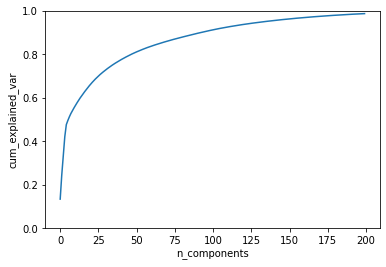

In [129]:
pca_n_components = 200
pca = PCA(n_components=pca_n_components)
train_num_pca = pd.DataFrame(pca.fit_transform(train_num_scaled),columns=[f"pca{i+1}" for i in range(pca_n_components)])

pca_explained_var = pd.Series(pca.explained_variance_ratio_.cumsum()).reset_index()
pca_explained_var.columns = ['n_components','cum_explained_var']

sns.lineplot(data=pca_explained_var,x='n_components',y='cum_explained_var')
plt.ylim([0,1])
plt.show()

In [131]:
pca_explained_var.iloc[-1]

n_components         199.000000
cum_explained_var      0.987734
Name: 199, dtype: float64

In [132]:
ohe = OneHotEncoder(drop="first")
train_cat_ohe = ohe.fit_transform(train_cat)
train_cat_ohe = pd.DataFrame(train_cat_ohe.toarray(),columns=ohe.get_feature_names_out())
train_cat_ohe.head(5)

,subject_B,subject_C,subject_D,subject_F,subject_G,subject_H,subject_I,subject_K,subject_L,subject_M,phase_2,phase_3,phase_4,state_B,state_C,state_D,state_E
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [133]:
train_concat = pd.concat([train_num_pca,train_cat_ohe],axis=1)
train_concat.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,subject_K,subject_L,subject_M,phase_2,phase_3,phase_4,state_B,state_C,state_D,state_E
0,-3.032506,-3.062813,-4.572669,-0.838078,6.389029,-1.079410,1.049353,0.846976,-2.456823,-1.736300,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,7.997720,-1.687093,1.703193,-0.580068,-3.193906,-2.280631,1.573460,-2.514034,-0.728222,1.666008,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-9.404525,1.695259,12.249572,9.263603,14.538742,-1.382768,3.265562,0.838067,-1.688740,-0.896983,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,-0.744583,-5.902031,-2.364589,-6.932070,1.438645,1.851355,3.181267,-7.113462,-0.721635,0.458521,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.051905,-1.039067,-7.116174,-2.271226,7.030159,-0.690243,0.506123,-1.972265,-2.367035,-1.824257,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [153]:
f_selector = SelectKBest(k=50)
train_concat_selected = f_selector.fit_transform(train_concat,train_y)

best_k = (f_selector.pvalues_ < 0.05).sum()
f_selector = SelectKBest(k=best_k)
train_concat_selected = f_selector.fit_transform(train_concat,train_y)
train_concat_selected = pd.DataFrame(train_concat_selected,columns=f_selector.get_feature_names_out())
train_concat_selected.head()

,pca1,pca2,pca3,pca5,pca6,pca10,pca15,pca17,pca23,pca28,...,subject_F,subject_G,subject_I,subject_K,subject_L,subject_M,phase_2,phase_3,phase_4,state_D
0,-3.032506,-3.062813,-4.572669,6.389029,-1.079410,-1.736300,0.736632,0.744262,-0.891092,-0.215793,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,7.997720,-1.687093,1.703193,-3.193906,-2.280631,1.666008,-0.215947,-2.231738,-1.679953,0.065097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-9.404525,1.695259,12.249572,14.538742,-1.382768,-0.896983,3.877376,-0.478250,-0.053178,-0.113815,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.744583,-5.902031,-2.364589,1.438645,1.851355,0.458521,-0.022879,1.199856,-5.937076,0.972817,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.051905,-1.039067,-7.116174,7.030159,-0.690243,-1.824257,-1.365499,1.950178,-2.229569,1.687298,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [154]:
f_selector_col_idx = {col:i for i, col in enumerate(train_concat.columns) if col in train_concat_selected.columns}

In [159]:
f_selector_scores = [{'col':col, 'score':f_selector.scores_[idx]}  for col, idx in f_selector_col_idx.items()]
f_selector_scores = pd.DataFrame(f_selector_scores)
f_selector_scores.sort_values("score",ascending=False).head(10)

,col,score
41,subject_G,630.009214
43,subject_K,97.680711
42,subject_I,82.956959
45,subject_M,46.552758
2,pca3,33.081708
39,subject_D,30.839719
3,pca5,30.451125
1,pca2,25.368775
38,subject_C,23.617124
46,phase_2,23.590887


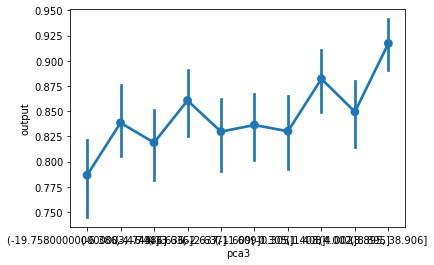

In [161]:
feature_bin = pd.qcut(train_concat['pca3'],q=10,duplicates="drop")
sns.pointplot(x=feature_bin,y=train_y)
plt.show()